In [1]:
from DiffEqPy import Variable
from DiffEqPy.functions import *
from DiffEqPy.utils import *
from DiffEqPy.layers import *
from DiffEqPy.models import MLP
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)
x = np.random.rand(100,1)
#y = 5 + 2*x + np.random.rand(100,1)
y = np.sin(2*np.pi*x) + np.random.rand(100,1)/10

In [3]:
model = MLP((10,10,1))

TypeError: Linear() takes no arguments

In [5]:
t = np.linspace(0,1).reshape(-1,1)

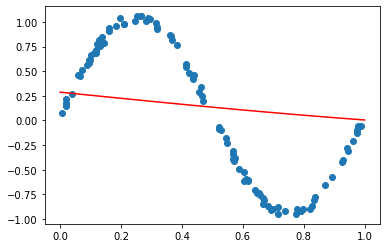

In [6]:
y_pred = model(t)
plt.plot(np.linspace(0,1), y_pred.data, c='r')
plt.scatter(x,y)
#plt.ylim(y.min()-0.1,y.max()+0.1)
#plt.xlim(x.min()-0.1,x.max()+0.1)

In [7]:
lr = 0.1
loss_his = []
for i in range(20000):
    y_pred = model(x)
    loss = mean_squared_error(y_pred, y)
    loss_his.append(loss.data)
    model.cleargrads()    
    loss.backward()
    for p in model.params():
        p.data -= lr * p.grad.data

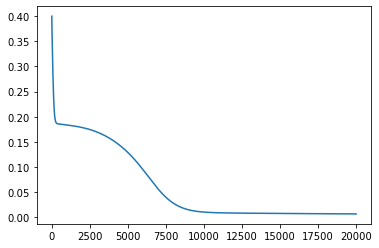

In [8]:
plt.plot(loss_his)

In [9]:
plot_dot_graph(loss)

In [10]:
y_pred = model(t)

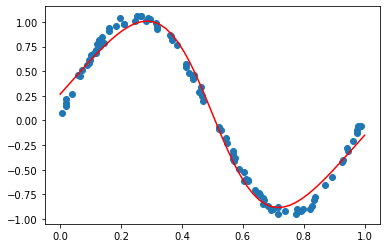

In [11]:
plt.plot(np.linspace(0,1), y_pred.data, c='r')
plt.scatter(x,y)
#plt.ylim(y.min()-0.1,y.max()+0.1)
#plt.xlim(x.min()-0.1,x.max()+0.1)